In [ ]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)


2.9.2


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target.shape

(569,)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target_names.shape

(2,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data.feature_names.shape

(30,)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size=0.33)
N, D = Xtrain.shape

In [ ]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((381, 30), (381,), (188, 30), (188,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
Xtrain.shape, Ytrain.shape

((381, 30), (381,))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = (D,), activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

r = model.fit(Xtrain, Ytrain, validation_data = (Xtest, Ytest), epochs = 100)

print("Train score:", model.evaluate(Xtrain, Ytrain))
print("Test score:", model.evaluate(Xtest, Ytest))


Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.6529 - accuracy: 0.6430 - val_loss: 0.6302 - val_accuracy: 0.6968
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5905 - accuracy: 0.7375 - val_loss: 0.5808 - val_accuracy: 0.7500
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5378 - accuracy: 0.8005 - val_loss: 0.5392 - val_accuracy: 0.7819
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.8294 - val_loss: 0.5038 - val_accuracy: 0.8191
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.8635 - val_loss: 0.4734 - val_accuracy: 0.8298
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4238 - accuracy: 0.8793 - val_loss: 0.4479 - val_accuracy: 0.8457
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3971 - accuracy: 0.8871 - val_loss: 0.4251 - val_accuracy: 0.8511
Epoch 8/100


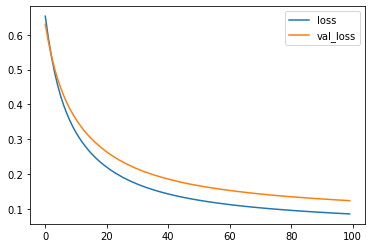

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

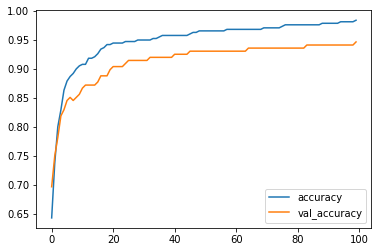

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [ ]:
P = model.predict(Xtest)
print(P)

6/6 [==============================] - 0s 5ms/step
[[9.91050839e-01]
 [9.35087204e-01]
 [3.22688259e-02]
 [9.89295661e-01]
 [9.61254239e-01]
 [9.79246318e-01]
 [1.00207105e-02]
 [9.90659893e-01]
 [9.98355567e-01]
 [9.95154142e-01]
 [9.93172884e-01]
 [9.97883916e-01]
 [6.58689082e-01]
 [9.97741878e-01]
 [9.44255710e-01]
 [9.85335946e-01]
 [9.58037436e-01]
 [5.89820981e-01]
 [9.99349117e-01]
 [9.98365700e-01]
 [9.98729944e-01]
 [9.98605728e-01]
 [2.72716716e-06]
 [9.91776586e-01]
 [2.38643233e-02]
 [9.74355042e-01]
 [9.59515452e-01]
 [8.32048953e-01]
 [9.99749720e-01]
 [7.11475918e-03]
 [9.90302742e-01]
 [4.99636620e-01]
 [9.22796056e-02]
 [9.56290483e-01]
 [8.27018738e-01]
 [9.40565646e-01]
 [6.23216838e-05]
 [9.66747284e-01]
 [1.30340280e-02]
 [7.61887670e-01]
 [9.41658974e-01]
 [9.98681486e-01]
 [6.06452078e-02]
 [9.92267609e-01]
 [9.78071272e-01]
 [9.98525441e-01]
 [8.11395764e-01]
 [8.51222035e-03]
 [9.99142766e-01]
 [9.97039616e-01]
 [9.99598563e-01]
 [8.55125725e-01]
 [3.56053497e

In [ ]:
import numpy as np
P = np.round(P).flatten()

In [ ]:
print(P)

[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
print("Manually calculated accuracy:", np.mean(P == Ytest))
print("Evaluate output:", model.evaluate(Xtest, Ytest))

Manually calculated accuracy: 0.9468085106382979
6/6 [==============================] - 0s 4ms/step - loss: 0.1242 - accuracy: 0.9468
Evaluate output: [0.12421964854001999, 0.9468085169792175]


# Saving and loading a model

In [15]:
model.save('Linearclassifier.h5')

In [16]:
# check

!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Oct 25 15:36 Linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Oct 21 13:33 sample_data


In [20]:
model = tf.keras.models.load_model('Linearclassifier.h5')
print(model.layers)
model.evaluate(Xtest, Ytest)

6/6 [==============================] - 0s 4ms/step - loss: 0.1242 - accuracy: 0.9468


[0.12421964854001999, 0.9468085169792175]

In [21]:
from google.colab import files
files.download('Linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>